# **Modules**

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from keras.utils import np_utils
import seaborn as sns
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
# example of loading an image with the Keras API
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D, Rescaling

# **Load dataset**

# Exemples du dataset

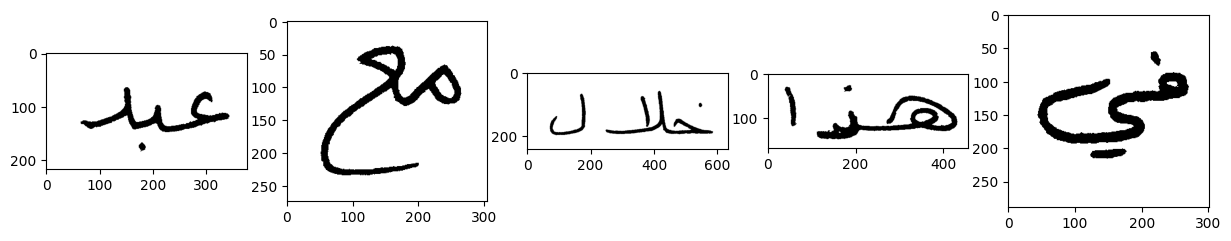

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

img =  load_img('../dataset/abed/abed001.tif')
img2 =  load_img('../dataset/ma/ma001.tif')
img3 =  load_img('../dataset/khelal/khelal001.tif')
img4 =  load_img('../dataset/hatha/hatha006.tif')
img5 = load_img('../dataset/in/in021.tif')
ax[0].imshow(img)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)

# Building dataset

In [8]:
dataset_images  = []
dataset_labels = []
directory ='../dataset/abed'
rootdir = '../dataset'
shape = (200,200)
for subdir, dirs, files in os.walk(rootdir):
 
  for file in files:
    if file.split('.')[1] == 'tif':

      img = cv2.imread(os.path.join(subdir, file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img,shape)
      dataset_images.append(img)
      dataset_labels.append(os.path.basename(subdir))


df = pd.DataFrame()
df['images'] = dataset_images
df['labels'] = dataset_labels
labels = dataset_labels
train_labels = pd.get_dummies(labels ).values
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

print(df)


                                                 images labels
0     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   abed
1     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   abed
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   abed
3     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   abed
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   abed
...                                                 ...    ...
1903  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   ykon
1904  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   ykon
1905  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   ykon
1906  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   ykon
1907  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   ykon

[1908 rows x 2 columns]


## Encoding Labels

In [10]:
unique_labels = list(OrderedDict.fromkeys(labels))
df_labels = pd.DataFrame()
df_labels['labels'] = df['labels']
labelencoder = LabelEncoder()
df_labels['labels_cat'] = labelencoder.fit_transform(df_labels['labels'] )
new_y = np.array(df_labels['labels_cat'] )

unique_labels_num = np.array(df_labels['labels_cat'].drop_duplicates())
print(df_labels)
print(new_y)
print(unique_labels_num)
print(unique_labels)

dict_lab =dict()
for i in range(0,len(unique_labels_num)):
  dict_lab[unique_labels_num[i]] = unique_labels[i]

print(dict_lab)

     labels  labels_cat
0      abed           0
1      abed           0
2      abed           0
3      abed           0
4      abed           0
...     ...         ...
1903   ykon          27
1904   ykon          27
1905   ykon          27
1906   ykon          27
1907   ykon          27

[1908 rows x 2 columns]
[ 0  0  0 ... 27 27 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
['abed', 'ala', 'alaam', 'allah', 'althy', 'alty', 'alyom', 'an', 'aw', 'ela', 'en', 'hatha', 'hathih', 'hnak', 'hwa', 'hya', 'in', 'kan', 'khelal', 'kma', 'ma', 'maa', 'mn', 'mohd', 'qabel', 'qd', 'tm', 'ykon']
{0: 'abed', 1: 'ala', 2: 'alaam', 3: 'allah', 4: 'althy', 5: 'alty', 6: 'alyom', 7: 'an', 8: 'aw', 9: 'ela', 10: 'en', 11: 'hatha', 12: 'hathih', 13: 'hnak', 14: 'hwa', 15: 'hya', 16: 'in', 17: 'kan', 18: 'khelal', 19: 'kma', 20: 'ma', 21: 'maa', 22: 'mn', 23: 'mohd', 24: 'qabel', 25: 'qd', 26: 'tm', 27: 'ykon'}


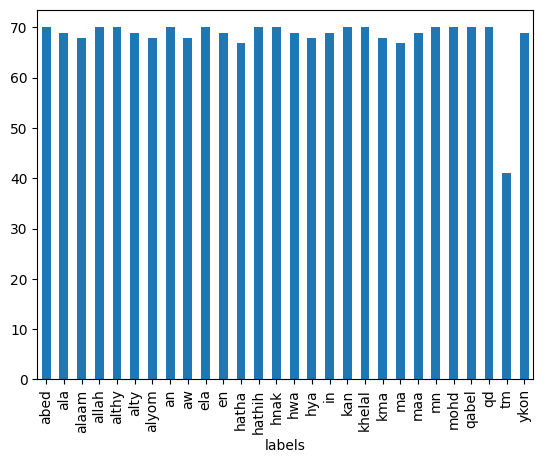

In [11]:
df2 = df.groupby(['labels'])['labels'].count().plot(kind='bar')

abed


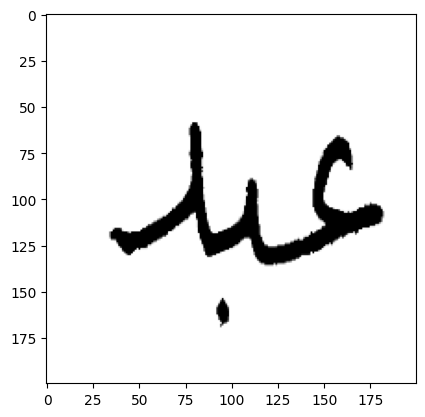

In [12]:
plt.imshow(dataset_images[0], cmap='Greys_r')
print(dataset_labels[0])

In [13]:
df['labels']

0       abed
1       abed
2       abed
3       abed
4       abed
        ... 
1903    ykon
1904    ykon
1905    ykon
1906    ykon
1907    ykon
Name: labels, Length: 1908, dtype: object

**Reshape data for layer input**

In [14]:
print(dataset_images[80].shape)

(200, 200)


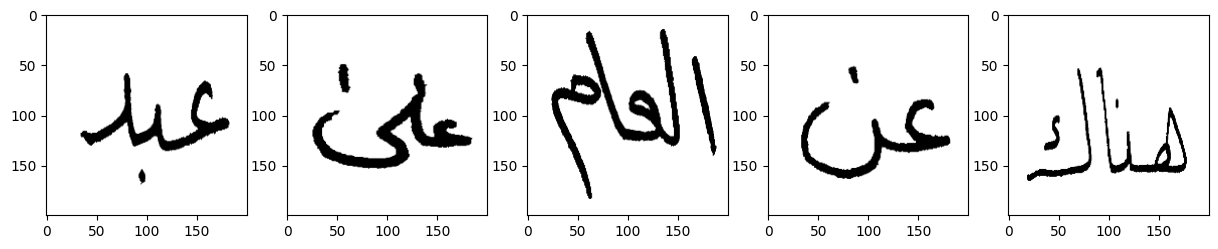

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
ax[0].imshow(dataset_images[0], cmap='Greys_r')
ax[1].imshow(dataset_images[70], cmap='Greys_r')
ax[2].imshow(dataset_images[170], cmap='Greys_r')
ax[3].imshow(dataset_images[500], cmap='Greys_r')
ax[4].imshow(dataset_images[900], cmap='Greys_r')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset_images, train_labels,test_size=0.2, random_state=42)

[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


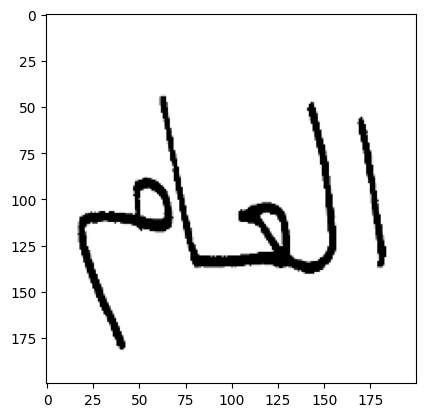

In [17]:
plt.imshow(X_train[0], cmap='Greys_r')
print(y_train[0])

label to text 

# **Building model**

In [18]:
X_train.shape

(1526, 200, 200)

In [19]:
y_train.shape

(1526, 28)

In [20]:
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
y_train.shape

(1526, 28)

[False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False]


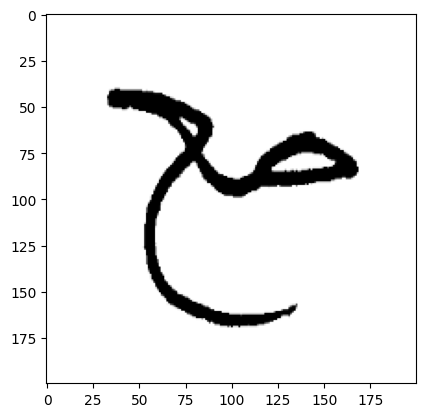

In [22]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])


In [23]:
y_train.shape

(1526, 28)

Reshape labels

In [24]:
history = model.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 98s 3s/step - loss: 53.6367 - accuracy: 0.1284 - val_loss: 58.8771 - val_accuracy: 0.0340
Epoch 2/40
31/31 [==============================] - 96s 3s/step - loss: 46.6560 - accuracy: 0.2792 - val_loss: 45.3056 - val_accuracy: 0.1099
Epoch 3/40
31/31 [==============================] - 102s 3s/step - loss: 38.7975 - accuracy: 0.4286 - val_loss: 36.1038 - val_accuracy: 0.2016
Epoch 4/40
31/31 [==============================] - 72s 2s/step - loss: 31.3871 - accuracy: 0.5695 - val_loss: 28.3678 - val_accuracy: 0.4974
Epoch 5/40
31/31 [==============================] - 59s 2s/step - loss: 24.8553 - accuracy: 0.7313 - val_loss: 22.7355 - val_accuracy: 0.5419
Epoch 6/40
31/31 [==============================] - 60s 2s/step - loss: 19.5706 - accuracy: 0.8093 - val_loss: 19.9908 - val_accuracy: 0.2147
Epoch 7/40
31/31 [==============================] - 59s 2s/step - loss: 15.3368 - accuracy: 0.8696 - val_loss: 19.1220 - val_accuracy: 0.1073
Epoch

In [25]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                        

In [26]:
y_pred = model.predict(X_test)

12/12 [==============================] - 3s 226ms/step


In [27]:
y_true = y_test

In [28]:
X_test.shape

(382, 200, 200)

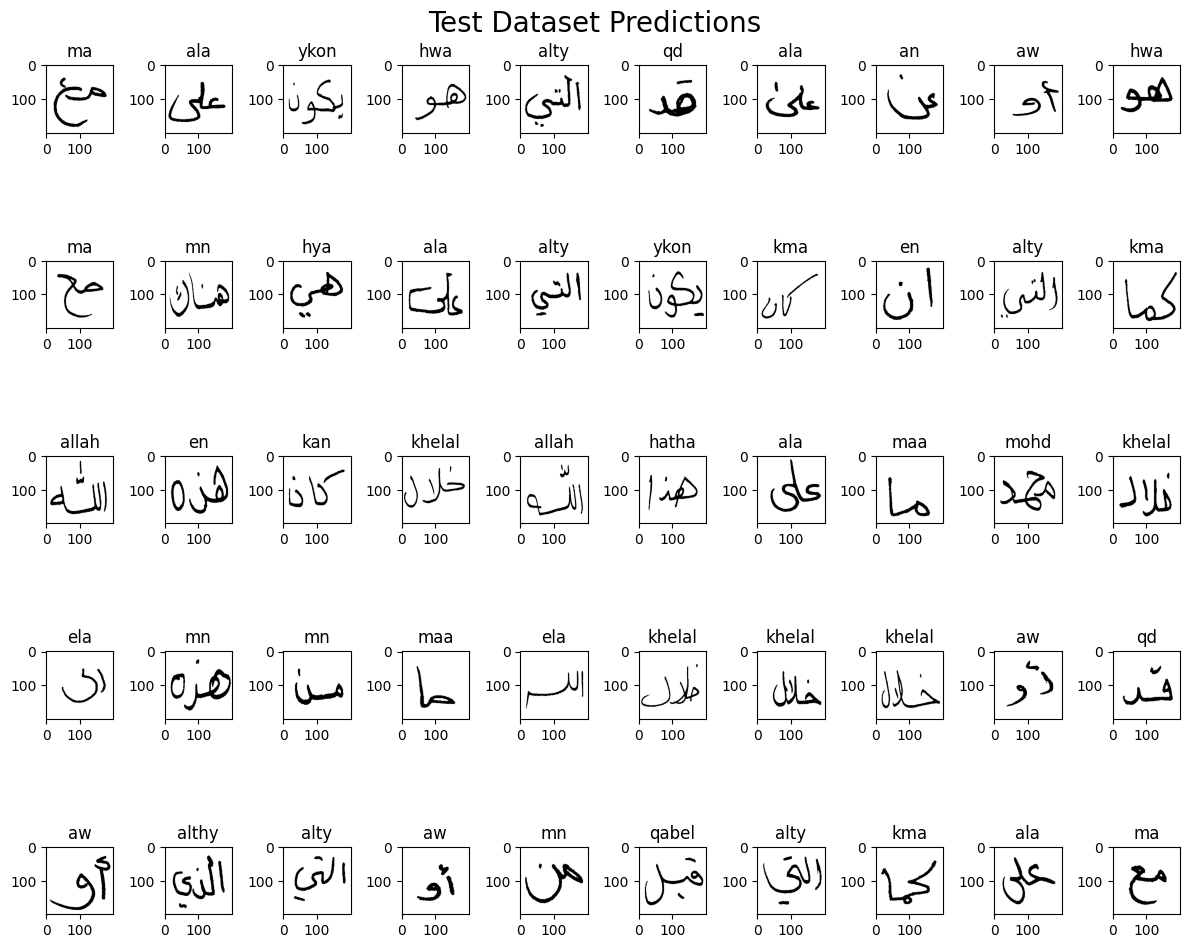

In [30]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        idx = i * 10 + j  # Calculate the index based on i and j
        if idx < len(y_pred):
            predicted_label = dict_lab[np.argmax(y_pred[idx])]
            ax[i, j].set_title(f"{predicted_label}")
            ax[i, j].imshow(X_test[idx], cmap='Greys_r')


plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [31]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

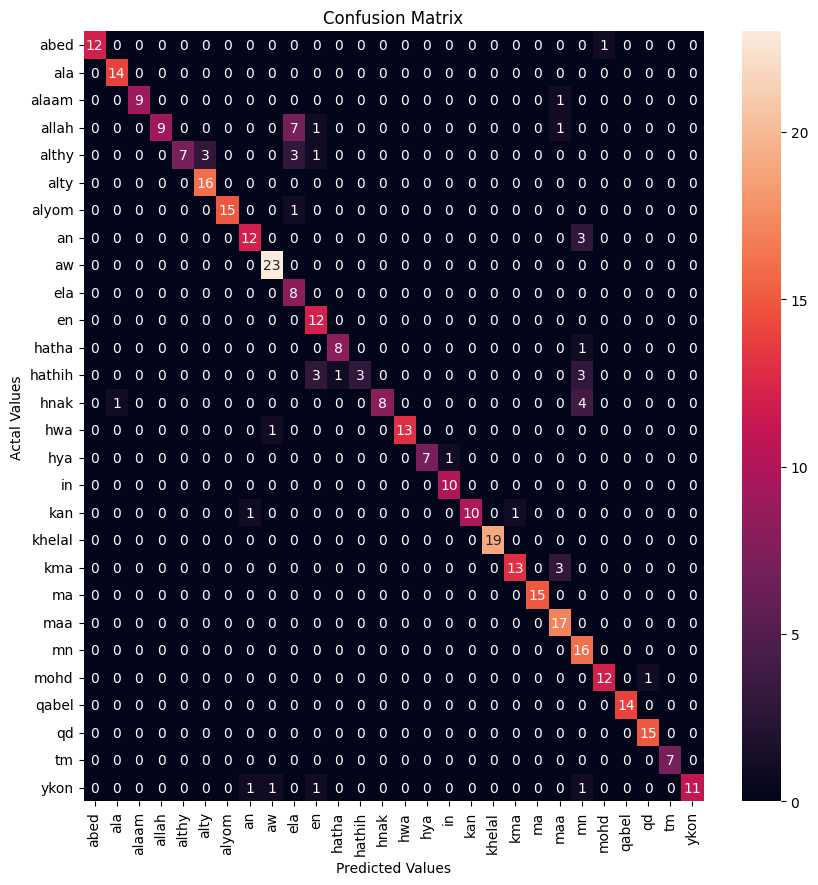

In [32]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [33]:
ll = log_loss(y_test, y_pred)

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [34]:
#good score is >8 
cks = cohen_kappa_score(y_testm, y_predm)

In [35]:
# Generate class membership probabilities
#good roc auc >8
ras = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

In [36]:
ras

0.9975154691313152

In [37]:
table = [[ll, cks, ras]]
pd.DataFrame(table, columns = ["log loss", "cohen_kappa_score", "roc_auc_score"])

,log loss,cohen_kappa_score,roc_auc_score
0,0.488926,0.872102,0.997515


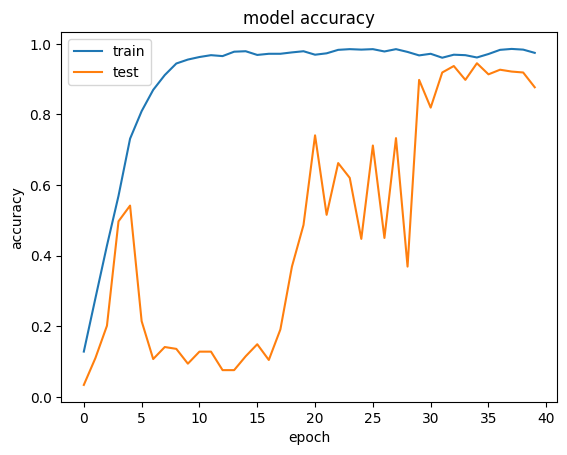

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

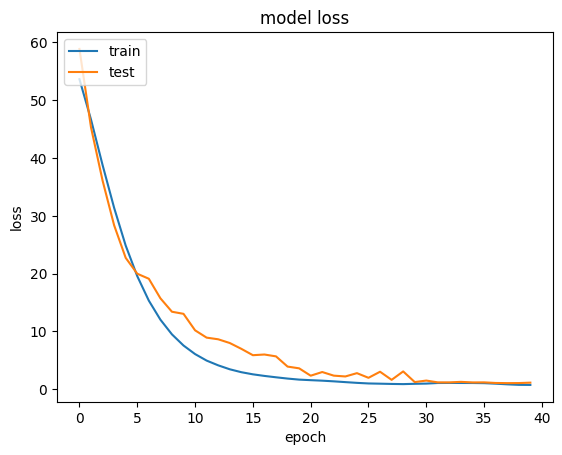

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = qabel  pred = qabel
real = en  pred = en
real = mohd  pred = mohd
real = khelal  pred = khelal
real = ma  pred = ma
real = hatha  pred = hatha
real = en  pred = en
real = an  pred = an
real = alty  pred = ela
real = mn  pred = mn
real = qabel  pred = qabel
real = khelal  pred = khelal
real = ela  pred = ela
real = en  pred = mn
real = ykon  pred = kan
real = mohd  pred = mohd
real = hwa  pred = mohd
real = kan  pred = mohd
real = ykon  pred = ykon
real = ala  pred = ela
real = aw  pred = aw
real = maa  pred = maa
real = hwa  pred = hwa
real = in  pred = in
real = althy  pred = althy
real = abed  pred = abed
real = en  pred = en
real = alyom  pred = ela
real = qd  pred = qd
real = in  pred = in
real = allah  pred = allah
real = maa  pred = maa
real = hnak  pred = hnak
real = hnak  pred = hnak
real = althy  pred = althy
real = in  pred = in
real = ala  pred = ala
real = ala  pred = ala
real = alty  pred = alty
real = kma  pred = kma
real = alty  pred = ela
real = aw  pred = aw
rea

In [41]:
model.save('../models/vgg_model.h5') 